In [69]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 10)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [70]:
# loan_data_path = "C:\Users\UEA\Desktop\DataMining_CW2\LendingClubLoans2018-2020.csv";
loan_data = pd.read_csv("C:\\Users\\UEA\\Desktop\\DataMining_CW2\\LendingClubLoans2018-2020.csv")
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Data columns (total 108 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   id                                          int64  
 1   emp_title                                   object 
 2   application_type                            object 
 3   home_ownership                              object 
 4   loan_status                                 object 
 5   loan_amnt                                   int64  
 6   int_rate                                    object 
 7   term                                        object 
 8   installment                                 float64
 9   grade                                       object 
 10  earliest_cr_line                            object 
 11  issue_d                                     object 
 12  last_pymnt_d                                object 
 13  next_pymnt_d                  

In [71]:
feature_missing_values = loan_data.isna().sum()
feature_missing_values = feature_missing_values.to_frame('Missing_Values')

In [72]:
percenatges_df = (loan_data.isna().sum()* 100 / len(loan_data)).to_frame('Missing_Percentages')
missing_values_stats_df = pd.concat([feature_missing_values, percenatges_df], axis=1)
missing_values_stats_df


,Missing_Values,Missing_Percentages
id,0,0.000000
emp_title,5862,7.597299
application_type,0,0.000000
home_ownership,0,0.000000
loan_status,0,0.000000
...,...,...
deferral_term,72668,94.179551
hardship_amount,71042,92.072215
hardship_payoff_balance_amount,71042,92.072215
hardship_last_payment_amount,71042,92.072215


In [73]:
missing_values_stats_df.loc['deferral_term']

Missing_Values         72668.000000
Missing_Percentages       94.179551
Name: deferral_term, dtype: float64

In [74]:
missing_values_stats_df[missing_values_stats_df['Missing_Percentages'] > 60]

,Missing_Values,Missing_Percentages
annual_inc_joint,67777,87.840693
verification_status_joint,67780,87.844581
hardship_reason,72668,94.179551
hardship_type,72668,94.179551
hardship_status,72668,94.179551
...,...,...
deferral_term,72668,94.179551
hardship_amount,71042,92.072215
hardship_payoff_balance_amount,71042,92.072215
hardship_last_payment_amount,71042,92.072215


In [75]:
more_null_values = []
for index, row in missing_values_stats_df.iterrows():
    if (row['Missing_Percentages'] > 60):
        more_null_values.append(index)

In [76]:
print('Number of Features which has more than 60 peercent of null values: ', len(more_null_values))
more_null_values

Number of Features which has more than 60 peercent of null values:  17


['annual_inc_joint',
 'verification_status_joint',
 'hardship_reason',
 'hardship_type',
 'hardship_status',
 'payment_plan_start_date',
 'dti_joint',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'deferral_term',
 'hardship_amount',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'orig_projected_additional_accrued_interest']

In [77]:
new_loan_df = loan_data.drop(more_null_values, axis=1)
# new_loan_df.info(verbose=True)

In [78]:
clustering_df = loan_data.drop(more_null_values, axis=1)

In [79]:
categorical_features = new_loan_df.select_dtypes(exclude=[np.number])
# print(len(categorical_features.columns))
# categorical_features
# new_loan_df[dtype="string"]
categorical_features.describe()

,emp_title,application_type,home_ownership,loan_status,int_rate,term,grade,earliest_cr_line,issue_d,last_pymnt_d,next_pymnt_d,verification_status,pymnt_plan,purpose,hardship_flag,initial_list_status,revol_util
count,71297,77159,77159,77159,77159,77159,77159,77159,77159,77159,33256,77159,77159,77159,75532,77159,77056
unique,28185,2,5,7,129,2,7,622,16,28,9,3,1,13,2,2,1074
top,Teacher,Individual,MORTGAGE,Fully Paid,16.02%,36 months,C,Sep-05,01/08/2017,01/05/2020,Jun-20,Source Verified,n,debt_consolidation,N,w,0%
freq,1658,67777,37334,34289,5181,52800,25152,665,17934,32333,29658,28886,77159,42980,71962,61477,509


In [208]:
categorical_features.shape

(77159, 17)

In [80]:
# categorical_features.describe()
new_loan_df['application_type'].unique()

array(['Individual', 'Joint App'], dtype=object)

In [81]:
features_for_One_hot = [
    'application_type',
    'hardship_flag',
    'initial_list_status',
]

features_for_ordinal_encoder = [
    'home_ownership',
    'grade',
    'purpose',
    'verification_status'
]

In [82]:
# for i in features_for_One_hot:    
#     print(new_loan_df[i].isna().sum())
# #     # integer encode
#     label_encoder = LabelEncoder()
#     integer_encoded = label_encoder.fit_transform(new_loan_df[i])
#     print(integer_encoded)
#     # binary encode
#     onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#     integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#     print(onehot_encoder.fit_transform(integer_encoded))

In [83]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
for i in features_for_One_hot:
    nullFlag = False
    nullList = []
    # integer encode
    if new_loan_df[i].isna().sum() > 0:
        nullFlag = True
        nullList = list(new_loan_df.loc[pd.isna(new_loan_df[i]), :].index)
        new_loan_df[i] = str(new_loan_df[i])

    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(new_loan_df[i])

    
    onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    new_loan_df[i] = onehot_encoder.fit_transform(integer_encoded)
    
    if nullFlag:
        new_loan_df.loc[nullList,i] = np.nan
new_loan_df[features_for_One_hot]


,application_type,hardship_flag,initial_list_status
0,1.0,1.0,0.0
1,1.0,1.0,0.0
2,1.0,1.0,0.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0
...,...,...,...
77154,1.0,1.0,0.0
77155,1.0,1.0,0.0
77156,1.0,1.0,0.0
77157,1.0,1.0,0.0


In [84]:
new_loan_df['hardship_flag'].isna().sum()

1627

In [85]:
new_loan_df[features_for_ordinal_encoder].isna().sum()

home_ownership         0
grade                  0
purpose                0
verification_status    0
dtype: int64

##### new_loan_df['initial_list_status'].unique()

In [86]:
import category_encoders as ce
enc = ce.OrdinalEncoder(cols=features_for_ordinal_encoder, handle_missing='return_nan', return_df= True)

#We now fit the model and transform the data and put it in X which is a dataframe
transformed_loan_df=enc.fit_transform(new_loan_df)
type(transformed_loan_df)

C:\Users\UEA\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


pandas.core.frame.DataFrame

In [87]:
# transformed_loan_df['int_rate'] = transformed_loan_df['int_rate'].str.split('%').str[0]
transformed_loan_df['int_rate'] = transformed_loan_df['int_rate'].str.rstrip('%').astype('float') / 100.0
transformed_loan_df['int_rate']

0        0.1505
1        0.1408
2        0.1408
3        0.1903
4        0.0890
          ...  
77154    0.1505
77155    0.0797
77156    0.0532
77157    0.2000
77158    0.0993
Name: int_rate, Length: 77159, dtype: float64

In [88]:
transformed_loan_df['revol_util'] = transformed_loan_df['revol_util'].str.rstrip('%').astype('float') / 100.0
transformed_loan_df['revol_util']

0        0.563
1        0.435
2        0.097
3        0.869
4        0.242
         ...  
77154    0.770
77155    0.590
77156    0.040
77157    0.727
77158    0.865
Name: revol_util, Length: 77159, dtype: float64

In [89]:

print(int(transformed_loan_df['term'][0].split(' ')[0]))
transformed_loan_df['term'] = [int(str(val).split(' ')[0]) for val in transformed_loan_df['term'].values]
transformed_loan_df['term']

36


0        36
1        60
2        60
3        36
4        60
         ..
77154    36
77155    36
77156    36
77157    36
77158    36
Name: term, Length: 77159, dtype: int64

In [90]:
transformed_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          77159 non-null  int64  
 1   emp_title                   71297 non-null  object 
 2   application_type            77159 non-null  float64
 3   home_ownership              77159 non-null  float64
 4   loan_status                 77159 non-null  object 
 5   loan_amnt                   77159 non-null  int64  
 6   int_rate                    77159 non-null  float64
 7   term                        77159 non-null  int64  
 8   installment                 77159 non-null  float64
 9   grade                       77159 non-null  float64
 10  earliest_cr_line            77159 non-null  object 
 11  issue_d                     77159 non-null  object 
 12  last_pymnt_d                77159 non-null  object 
 13  next_pymnt_d                332

In [91]:
unnecessary_features = [
    'id', 'emp_title', 'pymnt_plan', 'earliest_cr_line'
]
transformed_loan_df = transformed_loan_df.drop(unnecessary_features, axis=1)
transformed_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   application_type            77159 non-null  float64
 1   home_ownership              77159 non-null  float64
 2   loan_status                 77159 non-null  object 
 3   loan_amnt                   77159 non-null  int64  
 4   int_rate                    77159 non-null  float64
 5   term                        77159 non-null  int64  
 6   installment                 77159 non-null  float64
 7   grade                       77159 non-null  float64
 8   issue_d                     77159 non-null  object 
 9   last_pymnt_d                77159 non-null  object 
 10  next_pymnt_d                33256 non-null  object 
 11  annual_inc                  77159 non-null  float64
 12  verification_status         77159 non-null  float64
 13  purpose                     771

In [92]:
import datetime
import dateutil
from dateutil.rrule import rrule, MONTHLY
for_dates_df = transformed_loan_df.copy()
for_dates_df['remaining_term'] = np.nan
for_dates_df['missing_term'] = np.nan
for_dates_df['next_pymnt_d'].fillna("nan",inplace=True)
for index, i in for_dates_df.iterrows():
    strt_dt = datetime.date(
        int(i['issue_d'].split('/')[2]),
        int(i['issue_d'].split('/')[0]),
        int(i['issue_d'].split('/')[1]))
    a_month = dateutil.relativedelta.relativedelta(months=i['term'])
    date_plus_month = strt_dt + a_month
    nextDate = np.nan
    if i['next_pymnt_d'] != "nan":
        nextDate = datetime.datetime.strptime(i['next_pymnt_d'],"%b-%y").strftime('%Y-%m-%d')
        next_to_date = datetime.date(
        int(nextDate.split('-')[0]),
        int(nextDate.split('-')[1]),
        int(nextDate.split('-')[2]))
        dates = [dt for dt in rrule(MONTHLY, dtstart=next_to_date, until=date_plus_month)]
        for_dates_df.at[index,'remaining_term'] = len(dates)

        last_month_date = datetime.date(
        int(i['last_pymnt_d'].split('/')[2]),
        int(i['last_pymnt_d'].split('/')[0]),
        int(i['last_pymnt_d'].split('/')[1]))
        missingInsdates = [dt for dt in rrule(MONTHLY, dtstart=last_month_date, until=next_to_date)]
        for_dates_df.at[index,'missing_term'] = len(missingInsdates) - 2




In [94]:
for_dates_df["next_pymnt_d"].replace({"nan": np.nan}, inplace=True)
transformed_loan_df['missing_term'] = for_dates_df['missing_term']
transformed_loan_df['remaining_term'] = for_dates_df['remaining_term']
for_dates_df[['issue_d', 'last_pymnt_d','next_pymnt_d', 'missing_term', 'remaining_term']].sample(3)

,issue_d,last_pymnt_d,next_pymnt_d,missing_term,remaining_term
24386,01/04/2013,01/05/2018,NaN,NaN,NaN
4025,01/12/2017,01/07/2019,NaN,NaN,NaN
76682,01/09/2017,01/11/2018,NaN,NaN,NaN


In [95]:
transformed_loan_df[['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'term', 'missing_term', 'remaining_term']]

,issue_d,last_pymnt_d,next_pymnt_d,term,missing_term,remaining_term
0,01/08/2017,01/04/2020,NaN,36,NaN,NaN
1,01/07/2017,01/06/2019,NaN,60,NaN,NaN
2,01/07/2017,01/05/2020,Jun-20,60,3.0,20.0
3,01/08/2017,01/10/2019,NaN,36,NaN,NaN
4,01/08/2013,01/01/2019,NaN,60,NaN,NaN
...,...,...,...,...,...,...
77154,01/09/2017,01/05/2020,Jun-20,36,3.0,0.0
77155,01/09/2017,01/05/2020,Jun-20,36,3.0,0.0
77156,01/12/2017,01/05/2018,NaN,36,NaN,NaN
77157,01/08/2017,01/06/2018,NaN,36,NaN,NaN


In [96]:
transformed_loan_df = transformed_loan_df.drop(['issue_d', 'last_pymnt_d', 'next_pymnt_d'], axis=1)

In [97]:
# remaining_categorical_values = ['issue_d', 'last_pymnt_d', 'next_pymnt_d']
# transformed_loan_df[remaining_categorical_values].describe()

# enc = ce.OrdinalEncoder(cols=remaining_categorical_values, handle_missing='return_nan', return_df= True)

# #We now fit the model and transform the data and put it in X which is a dataframe
# ENCODED_LOAN_DF = enc.fit_transform(transformed_loan_df)
# print(ENCODED_LOAN_DF['issue_d'].unique())
# print(ENCODED_LOAN_DF['last_pymnt_d'].unique())
# print(ENCODED_LOAN_DF['next_pymnt_d'].unique())

In [98]:
transformed_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   application_type            77159 non-null  float64
 1   home_ownership              77159 non-null  float64
 2   loan_status                 77159 non-null  object 
 3   loan_amnt                   77159 non-null  int64  
 4   int_rate                    77159 non-null  float64
 5   term                        77159 non-null  int64  
 6   installment                 77159 non-null  float64
 7   grade                       77159 non-null  float64
 8   annual_inc                  77159 non-null  float64
 9   verification_status         77159 non-null  float64
 10  purpose                     77159 non-null  float64
 11  hardship_flag               75532 non-null  float64
 12  dti                         77051 non-null  float64
 13  delinq_2yrs                 771

In [99]:
transformed_loan_df.shape

(77159, 86)

In [100]:
missing_values_features = []
for i in transformed_loan_df:
    if transformed_loan_df[i].isna().sum() > 0:
        missing_values_features.append(i)
print(len(missing_values_features))
missing_values_features

28


['hardship_flag',
 'dti',
 'inq_fi',
 'inq_last_12m',
 'open_acc_6m',
 'total_cu_tl',
 'total_bal_il',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'mths_since_rcnt_il',
 'mths_since_last_delinq',
 'mo_sin_old_il_acct',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'il_util',
 'bc_util',
 'all_util',
 'revol_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'avg_cur_bal',
 'bc_open_to_buy',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'missing_term',
 'remaining_term']

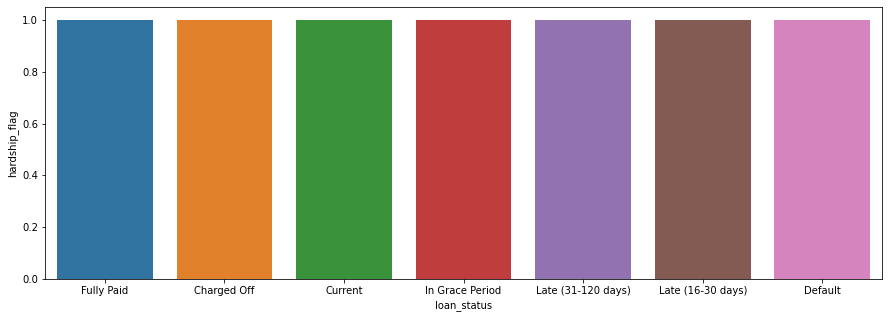

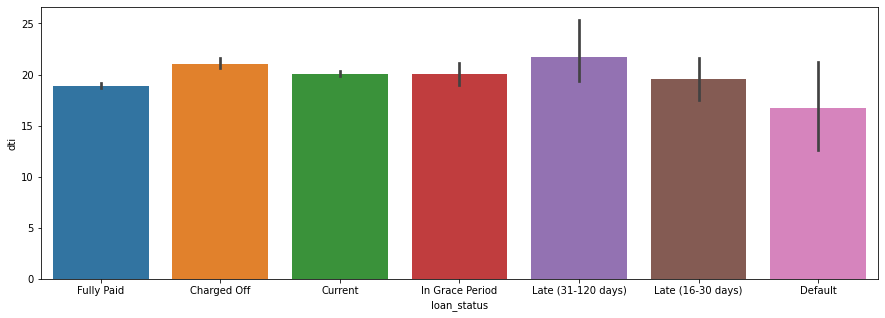

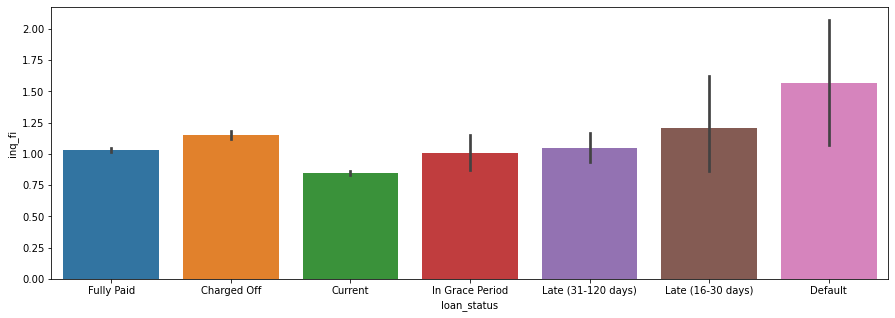

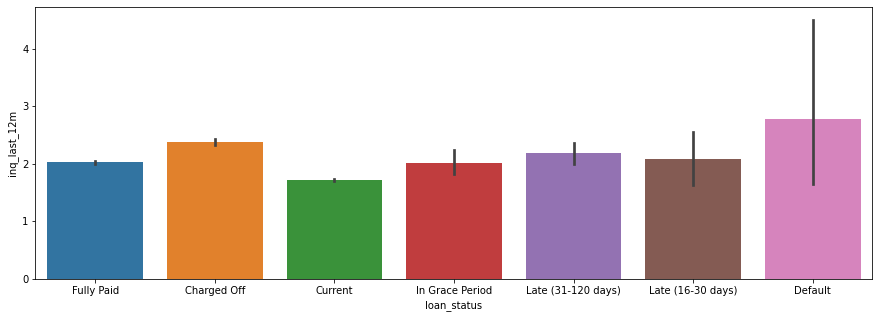

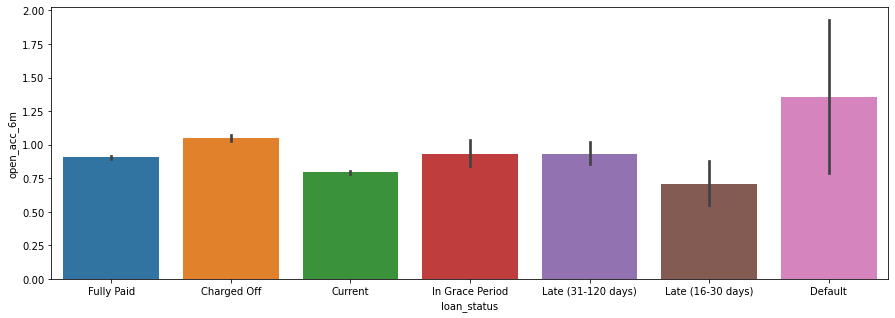

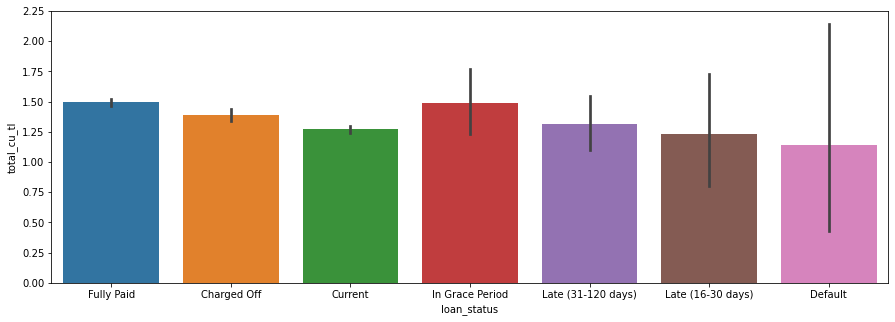

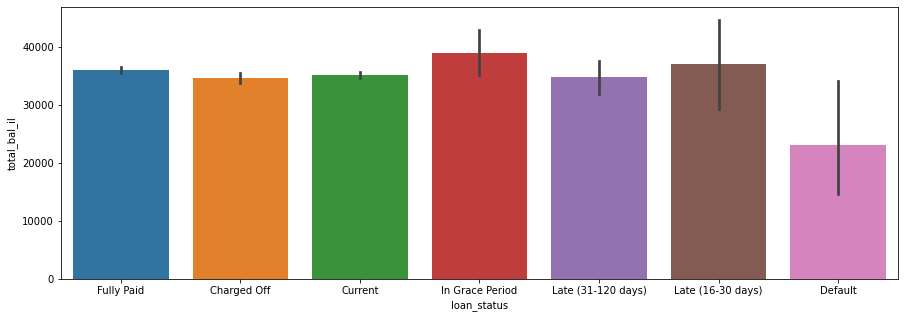

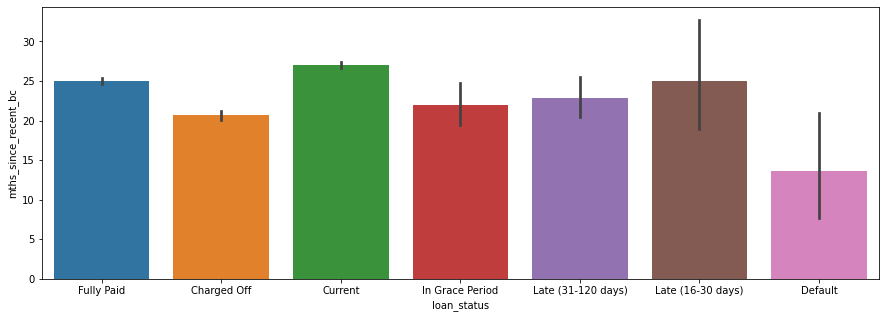

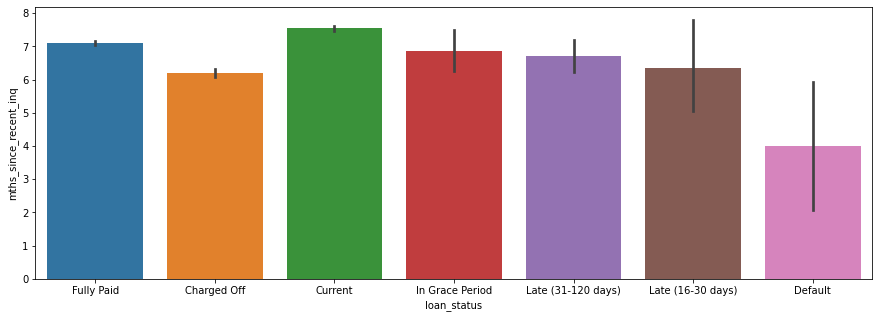

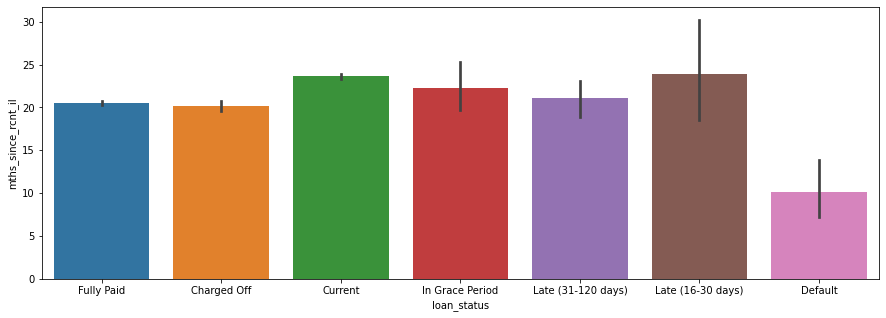

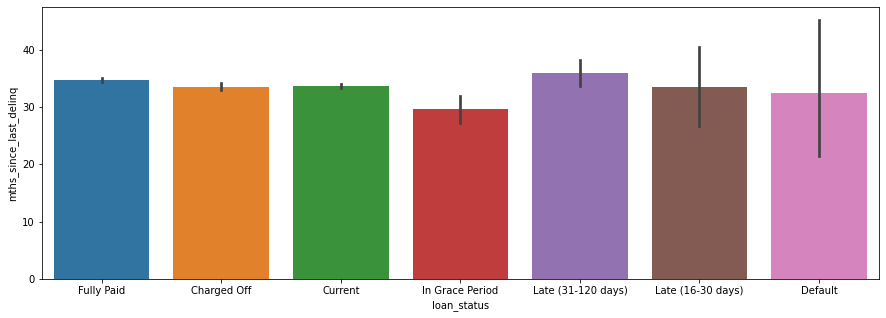

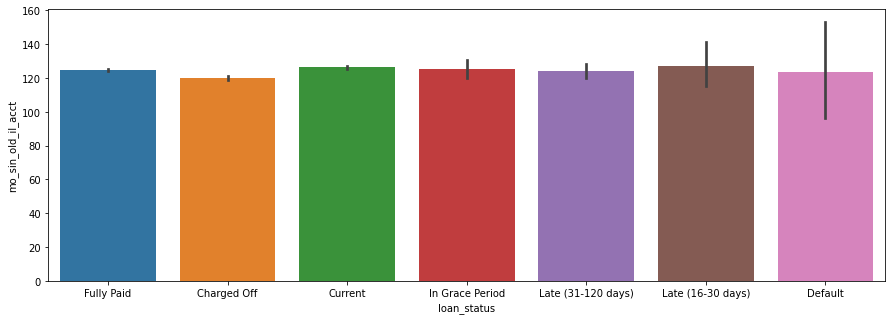

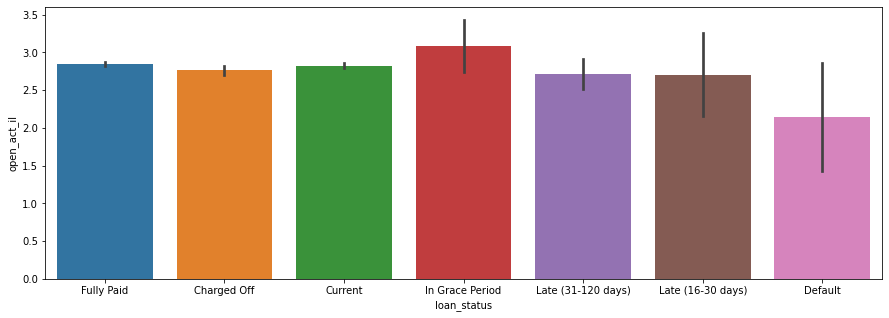

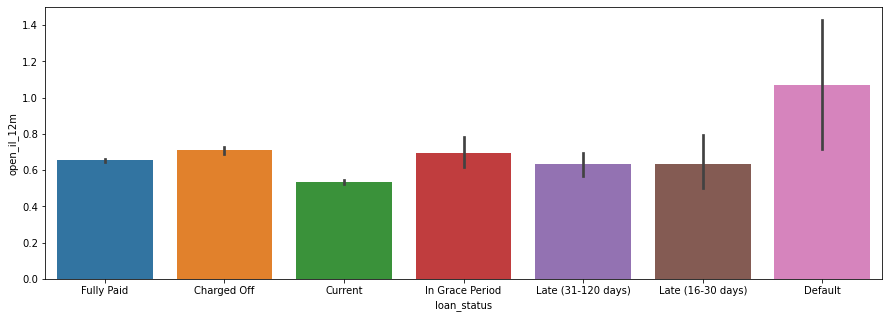

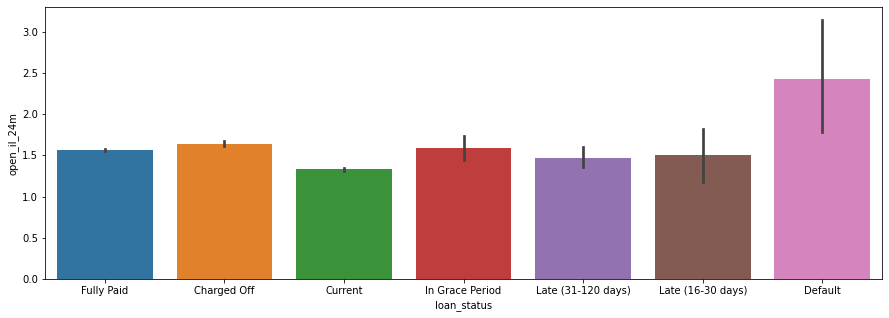

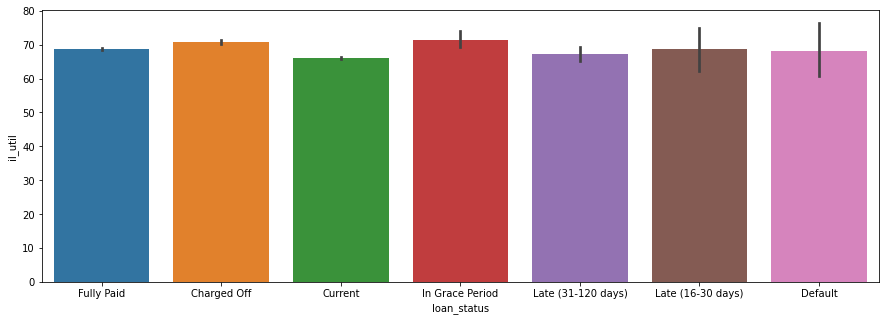

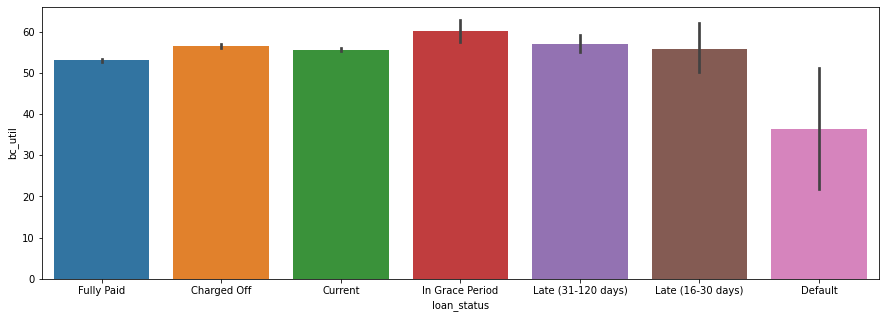

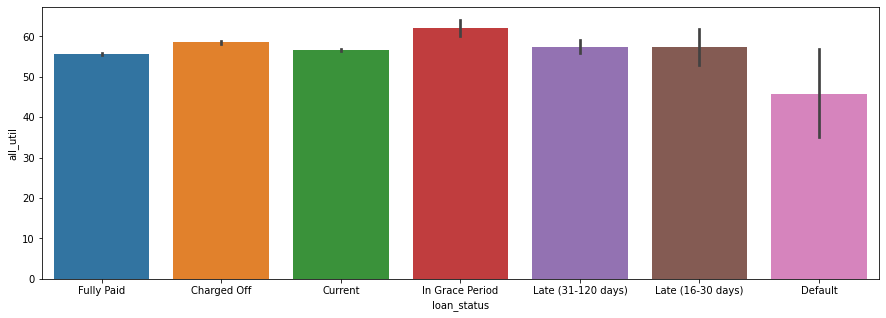

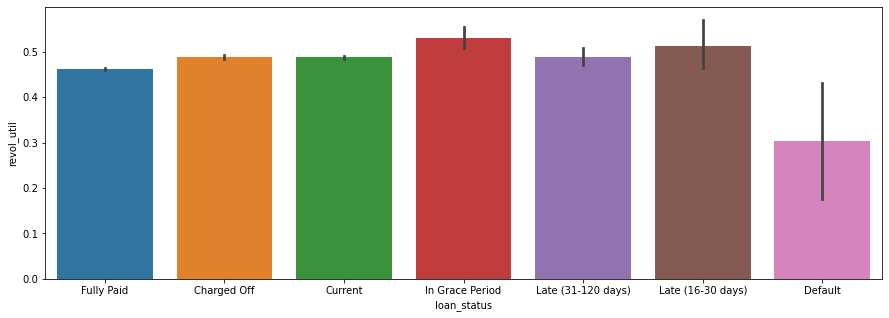

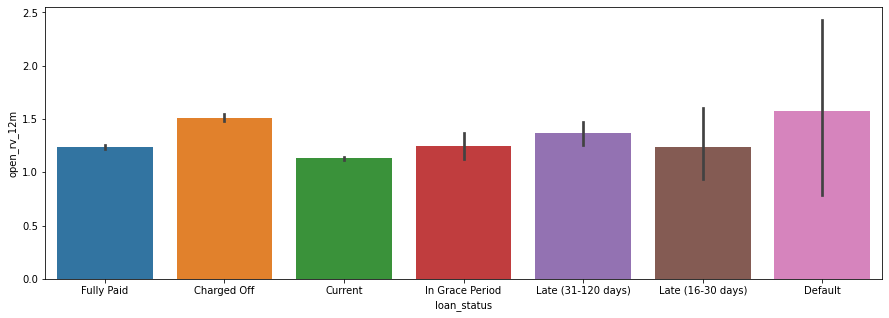

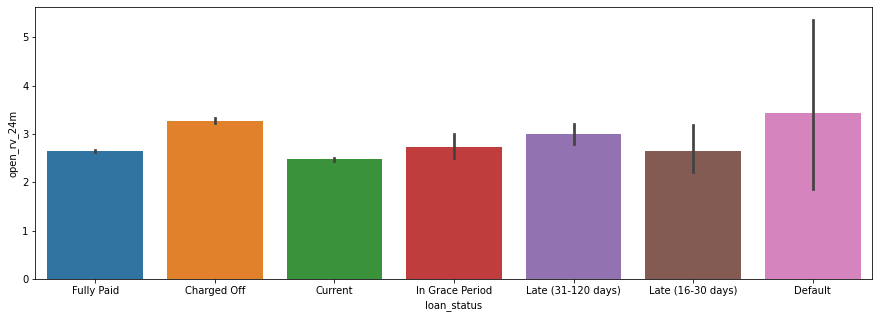

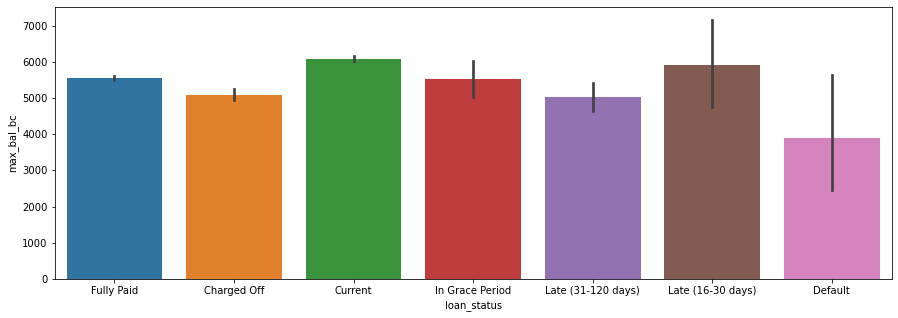

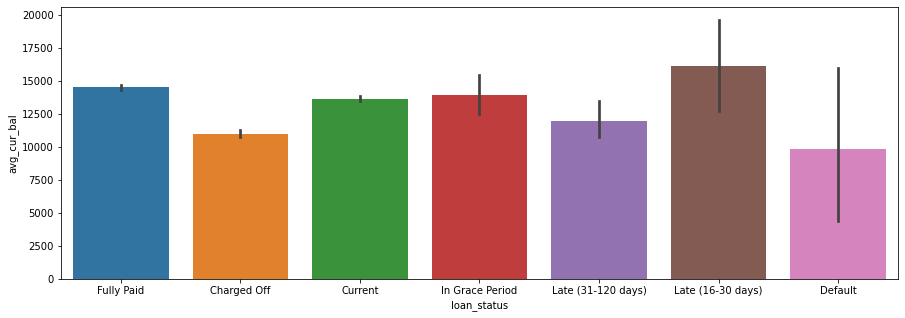

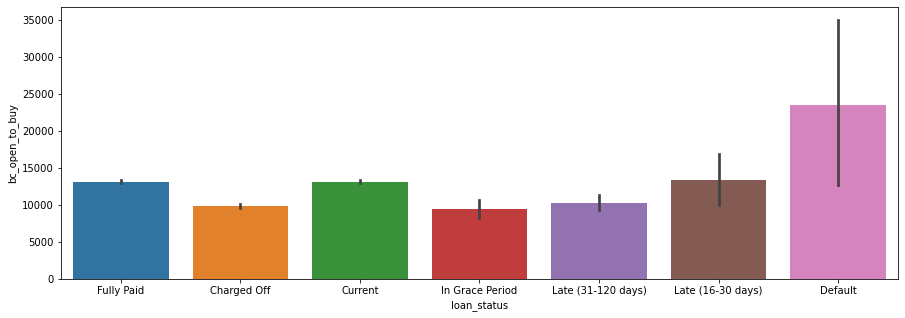

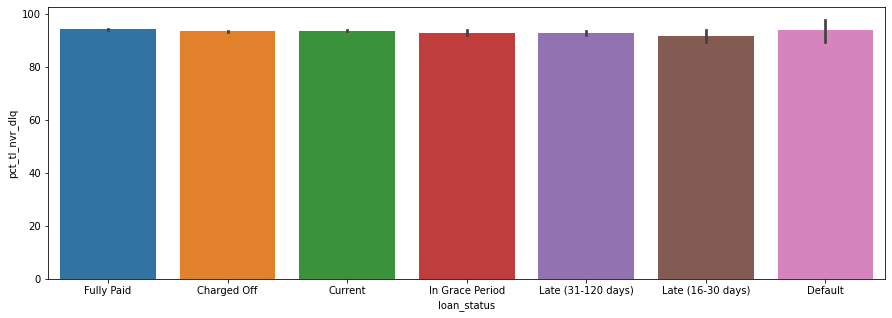

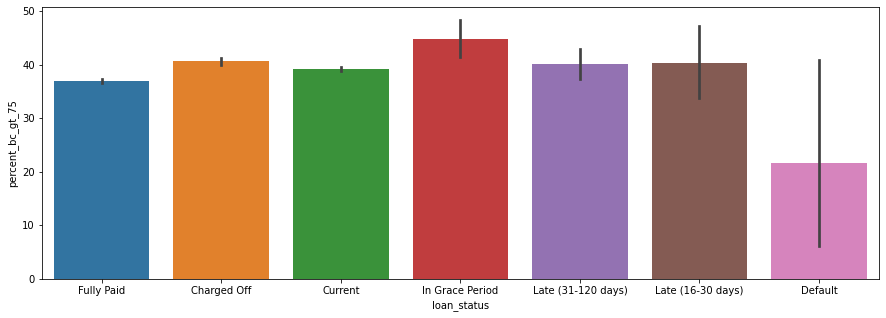

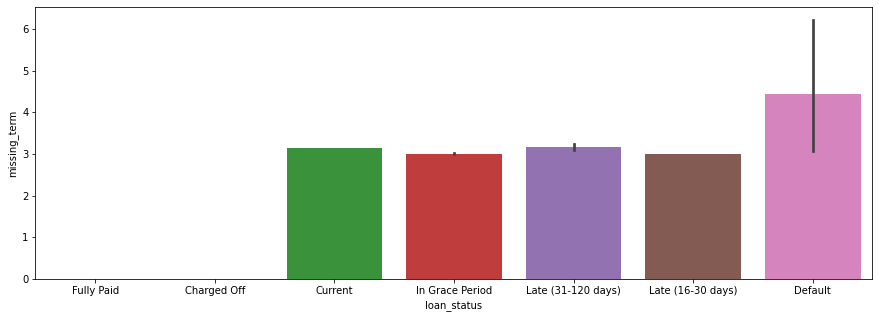

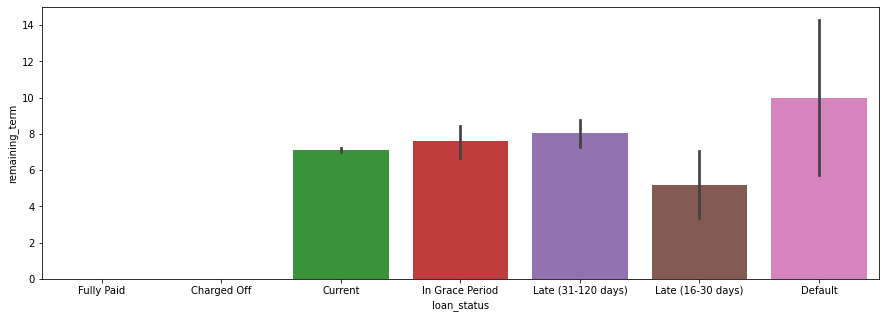

In [173]:
for i in missing_values_features:
    plt.figure(figsize=(15, 5))
    sns.barplot(x="loan_status", y=i, data=transformed_loan_df)
    plt.show()

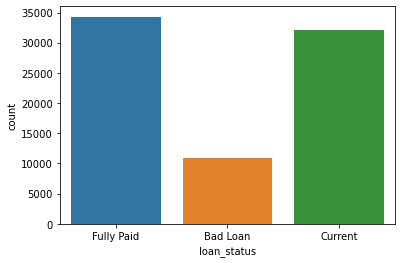

In [189]:
plt.figure(figsize=(15, 10))
sns.countplot(x='loan_status', data=transformed_loan_df)
plt.show()

In [102]:
#ENCODED_LOAN_DF[ENCODED_LOAN_DF['loan_status'] == 'Default']
#df.loc[df.Weight == "155", "Name"] = "John"
transformed_loan_df['loan_status'].mask(transformed_loan_df['loan_status'] == 'Late (31-120 days)', 'Bad Loan', inplace=True)
transformed_loan_df['loan_status'].mask(transformed_loan_df['loan_status'] == 'Late (16-30 days)', 'Bad Loan', inplace=True)
transformed_loan_df['loan_status'].mask(transformed_loan_df['loan_status'] == 'In Grace Period', 'Bad Loan', inplace=True)
transformed_loan_df['loan_status'].mask(transformed_loan_df['loan_status'] == 'Charged Off', 'Bad Loan', inplace=True)
transformed_loan_df['loan_status'].mask(transformed_loan_df['loan_status'] == 'Default', 'Bad Loan', inplace=True)

Null Values  :::::::::::::: 0
Unique Values:::::::::::::: ['Fully Paid' 'Bad Loan' 'Current']


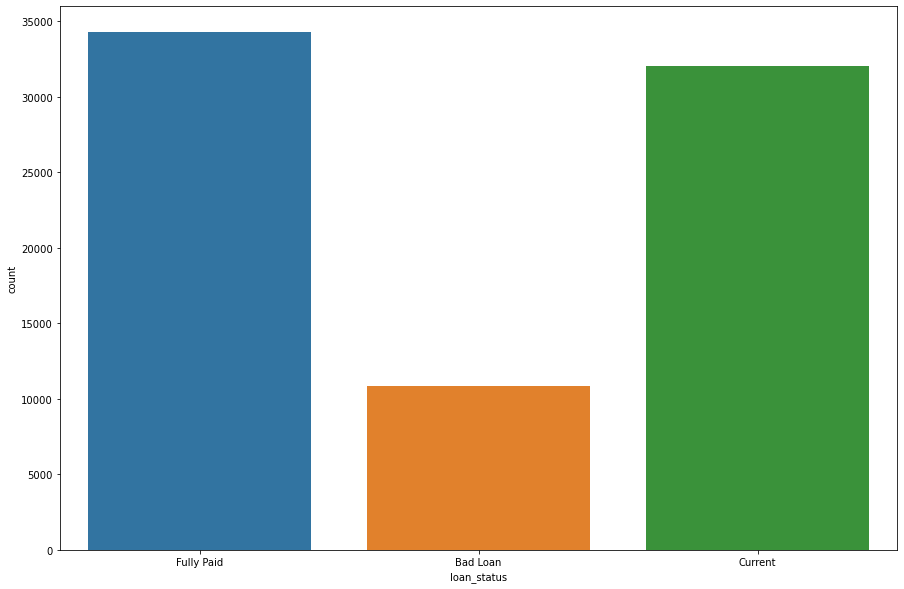

In [103]:
print('Null Values  ::::::::::::::', transformed_loan_df['loan_status'].isnull().sum())
print('Unique Values::::::::::::::', transformed_loan_df['loan_status'].unique())
plt.figure(figsize=(15, 10))
sns.countplot(x='loan_status', data=transformed_loan_df)
plt.show()

In [104]:
Y= transformed_loan_df['loan_status']
X= transformed_loan_df.drop(['loan_status'],axis = 1)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [106]:
print('Length of Features ', len(X_train))
print('Length of Target Calss ', len(y_train))
print(y_train)
X_train.sample(3)

Length of Features  61727
Length of Target Calss  61727
55799      Bad Loan
60478      Bad Loan
53654    Fully Paid
33680    Fully Paid
20606    Fully Paid
            ...    
20609      Bad Loan
21440    Fully Paid
73349       Current
50057       Current
5192     Fully Paid
Name: loan_status, Length: 61727, dtype: object


,application_type,home_ownership,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,...,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,missing_term,remaining_term
67732,1.0,1.0,10000,0.1262,36,335.12,1.0,54000.0,2.0,5.0,...,3,7,0,1,100.0,50.0,1,0,NaN,NaN
50669,1.0,2.0,4800,0.0993,36,154.73,4.0,34000.0,3.0,2.0,...,3,5,0,1,94.7,50.0,0,0,NaN,NaN
47836,1.0,1.0,12600,0.0721,36,390.27,3.0,76000.0,3.0,1.0,...,4,6,0,2,100.0,0.0,0,0,NaN,NaN


In [107]:
missing_values_features_in_train = []
for i in X_train:
    if X_train[i].isna().sum() > 0:
        missing_values_features_in_train.append(i)
print('Missing Value Features In train Set', len(missing_values_features_in_train))
missing_values_features_in_train

Missing Value Features In train Set 28


['hardship_flag',
 'dti',
 'inq_fi',
 'inq_last_12m',
 'open_acc_6m',
 'total_cu_tl',
 'total_bal_il',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'mths_since_rcnt_il',
 'mths_since_last_delinq',
 'mo_sin_old_il_acct',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'il_util',
 'bc_util',
 'all_util',
 'revol_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'avg_cur_bal',
 'bc_open_to_buy',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'missing_term',
 'remaining_term']

In [108]:
trainingset_columns = set(X_train.columns)
intersection = trainingset_columns.intersection(categorical_features.columns)
transformed_categorical_features = list(intersection)
transformed_categorical_features

['initial_list_status',
 'application_type',
 'purpose',
 'int_rate',
 'term',
 'revol_util',
 'verification_status',
 'grade',
 'hardship_flag',
 'home_ownership']

In [109]:
print('Null Values in transformed Categorical Column:')
for i in transformed_categorical_features:
    if X_train[i].isna().sum() > 0:
        print(i, X_train[i].isna().sum())

Null Values in transformed Categorical Column:
revol_util 83
hardship_flag 1299


In [110]:
# MISSING VALUES IN COPIED DATAFRAME

In [111]:
X_train_copy = X_train.copy()
# Hardship flag is a categorical label so will not be considered for outler detection
# Because Nan values are only for the fully paid and charged off
X_train_copy['missing_term'] = X_train_copy[['missing_term']].fillna(value=0)
X_train_copy['remaining_term'] = X_train_copy[['remaining_term']].fillna(value=0)
X_train_copy['revol_util'] = X_train_copy[['revol_util']].fillna(value=0)

# X_train_copy.drop(unnecessary_features, axis=1)

In [112]:
print(transformed_categorical_features)
X_train_copy = X_train_copy.drop([
    'hardship_flag',
    'initial_list_status',
    'grade', 
    'application_type', 
    'purpose', 
    'home_ownership', 
    'verification_status'
], axis=1)
print(X_train_copy.columns)

['initial_list_status', 'application_type', 'purpose', 'int_rate', 'term', 'revol_util', 'verification_status', 'grade', 'hardship_flag', 'home_ownership']
Index(['loan_amnt', 'int_rate', 'term', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_fi', 'inq_last_12m', 'inq_last_6mths',
       'fico_range_low', 'fico_range_high', 'last_fico_range_high',
       'last_fico_range_low', 'mort_acc', 'open_acc', 'open_acc_6m',
       'acc_open_past_24mths', 'pub_rec', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'total_cu_tl', 'tot_coll_amt',
       'tot_cur_bal', 'total_bal_il', 'total_rev_hi_lim', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'mths_since_rcnt_il',
       'mths_since_last_delinq', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', '

In [113]:
list1_as_set = set(X_train_copy.columns)
intersection = list1_as_set.intersection(transformed_categorical_features)


intersection_as_list = list(intersection)

print(intersection_as_list)

['int_rate', 'term', 'revol_util']


In [114]:

for i in X_train_copy.columns:
    if X_train_copy[i].isna().sum() > 0:
        X_train_copy[i] = X_train_copy[i].fillna(value=0)
print('Null Values in Copied Dataframe:', X_train_copy.isna().sum())

Null Values in Copied Dataframe: loan_amnt               0
int_rate                0
term                    0
installment             0
annual_inc              0
                       ..
percent_bc_gt_75        0
pub_rec_bankruptcies    0
tax_liens               0
missing_term            0
remaining_term          0
Length: 78, dtype: int64


In [115]:
# OUTLIER DETECTION IN COPIED DATAFRAME

In [116]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)
print(integer_encoded)

[0 0 2 ... 1 1 2]


In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn import model_selection

param_grid = {'n_estimators': [100, 90], 
              'max_samples': [100], 
              'contamination': ['auto', 0.4, 0.5], 
              'max_features': [5], 
              'bootstrap': [True, False], 
              'n_jobs': [5, 10]}
clf = IsolationForest(random_state=1)
grid_dt_estimator = model_selection.GridSearchCV(estimator=clf, 
                                                 param_grid=param_grid,
                                                 scoring=accuracy_score, 
                                                 refit=True,
                                                 cv=10,
                                                 return_train_score=True)
preds = grid_dt_estimator.fit(X_train_copy, integer_encoded)

ValueError: scoring value <function accuracy_score at 0x0000020E9A389280> looks like it is a metric function rather than a scorer. A scorer should require an estimator as its first parameter. Please use `make_scorer` to convert a metric to a scorer.

In [48]:
print(grid_dt_estimator.best_params_)

NameError: name 'grid_dt_estimator' is not defined

In [117]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(
    random_state = 1, 
    bootstrap = True, 
    contamination = 'auto',
    max_features = 5, 
    max_samples = 100, 
    n_estimators = 100, 
    n_jobs = 5
)
df_for_outliers = X_train_copy[X_train_copy.columns[~X_train_copy.columns.isin(transformed_categorical_features)]]
preds = clf.fit_predict(df_for_outliers)
print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

[1 1 1 ... 1 1 1]
Total number of outliers identified is:  6602


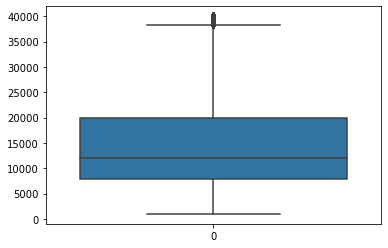

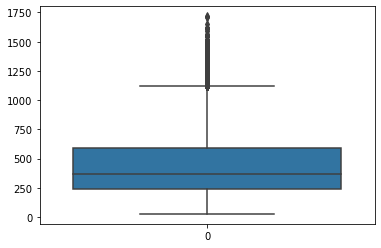

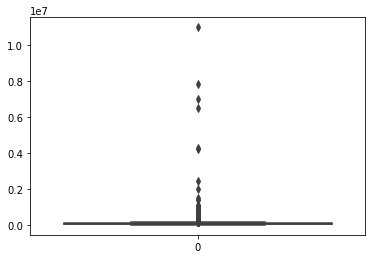

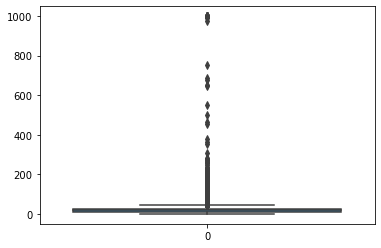

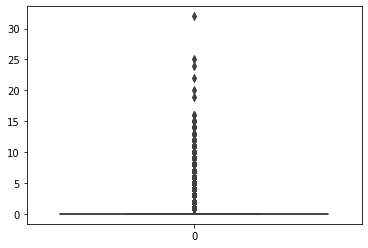

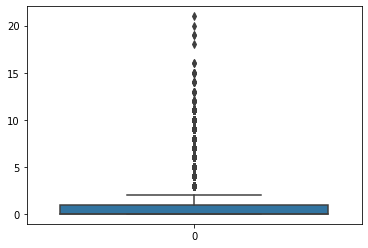

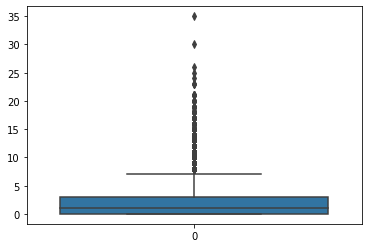

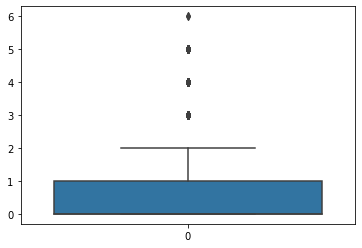

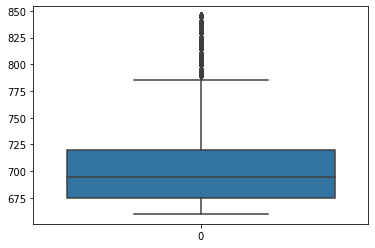

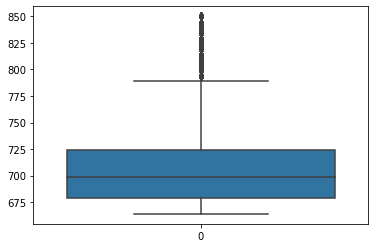

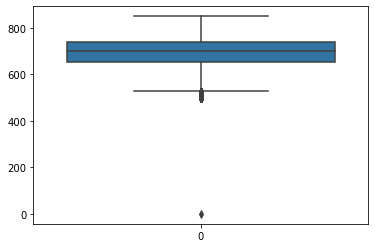

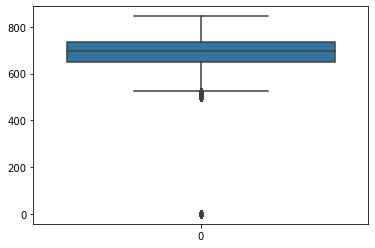

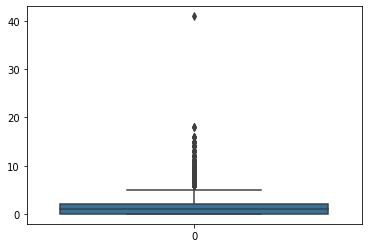

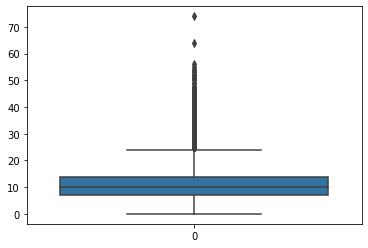

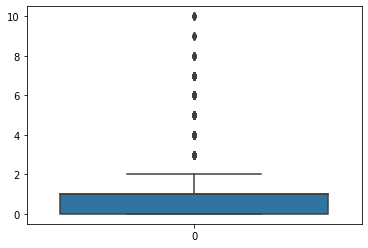

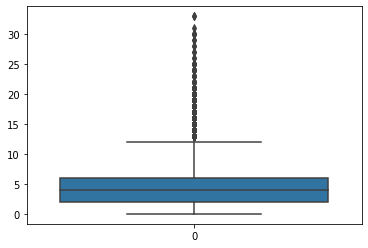

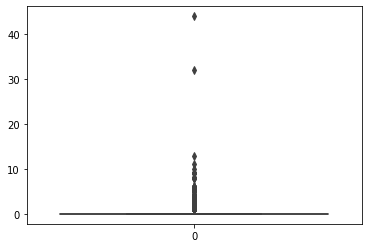

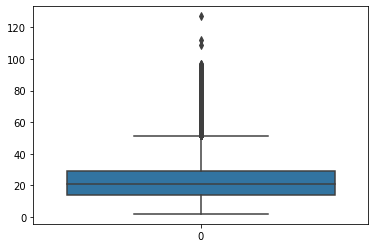

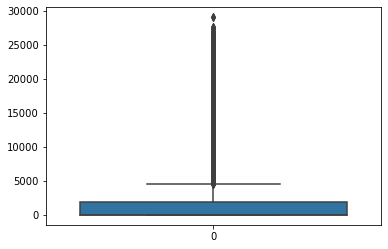

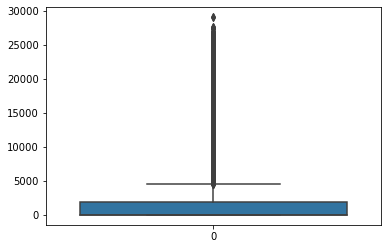

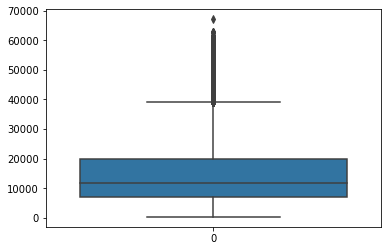

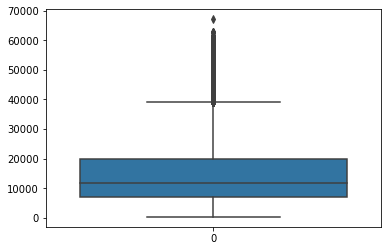

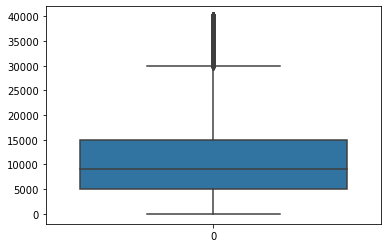

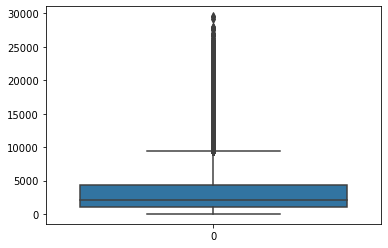

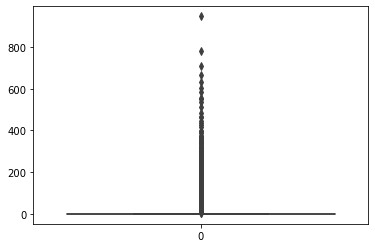

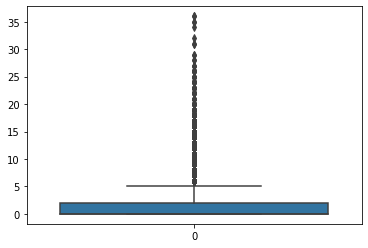

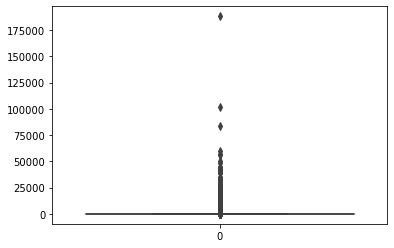

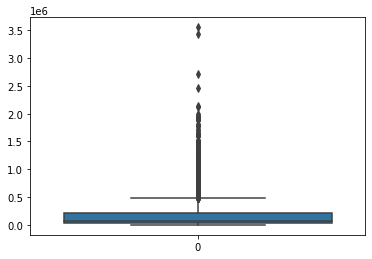

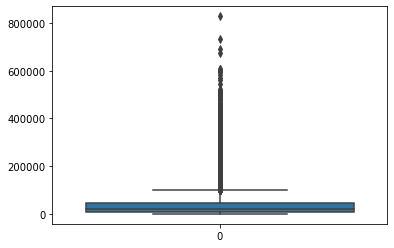

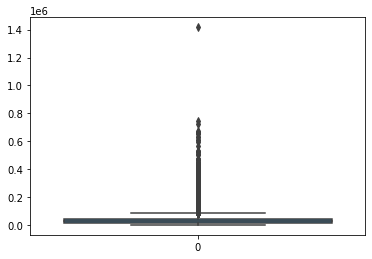

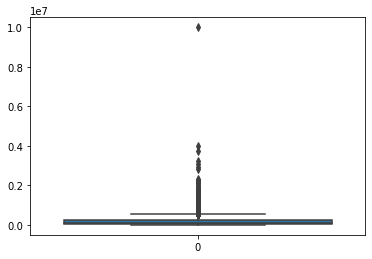

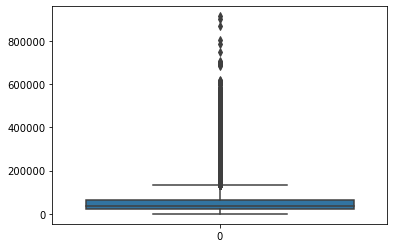

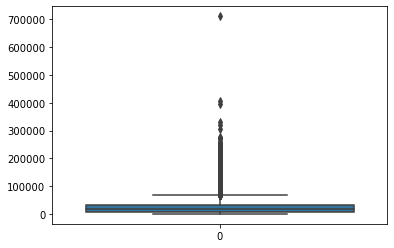

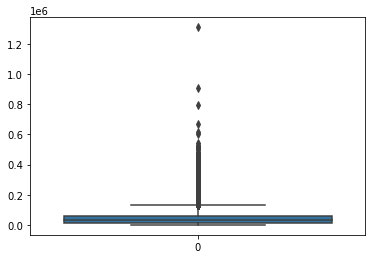

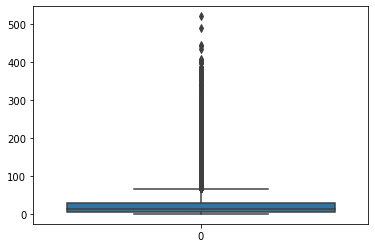

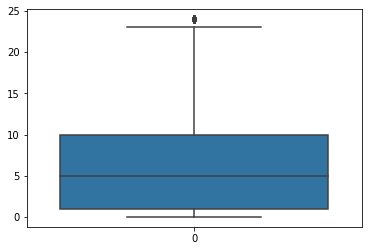

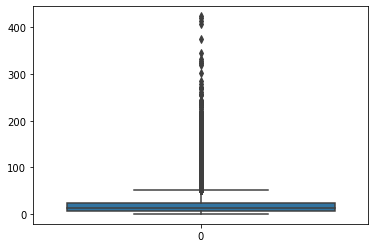

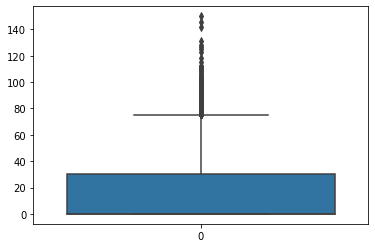

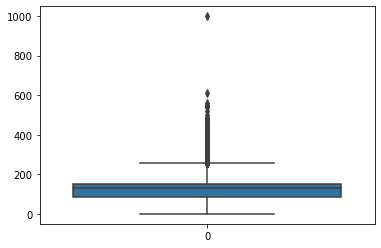

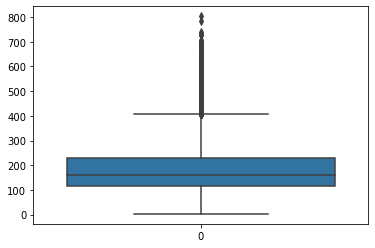

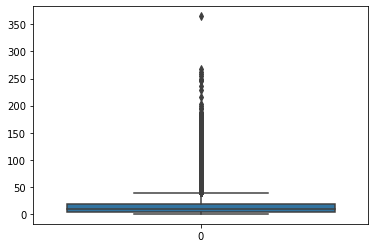

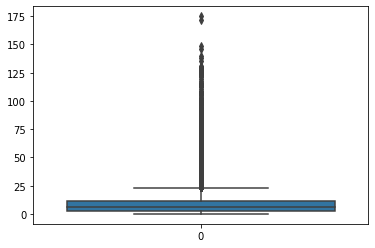

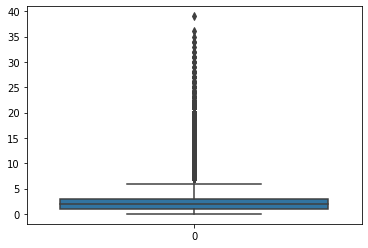

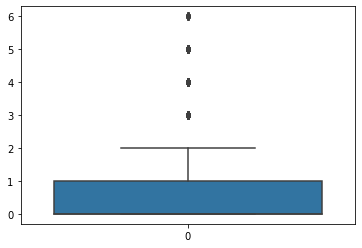

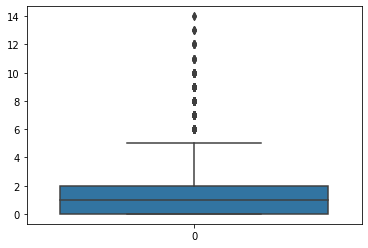

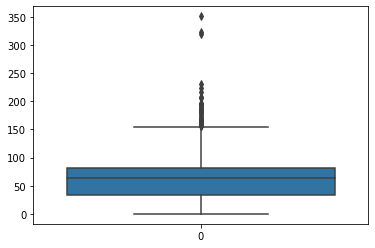

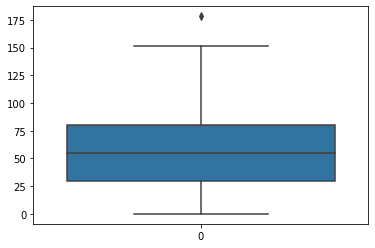

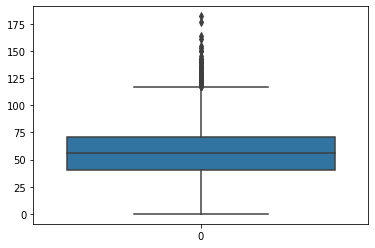

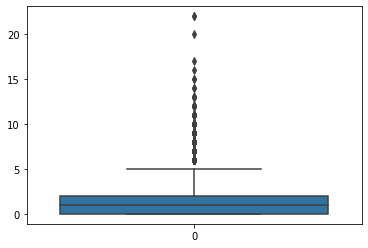

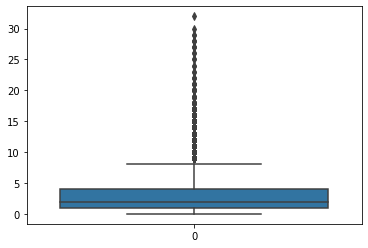

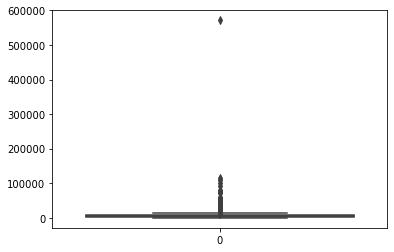

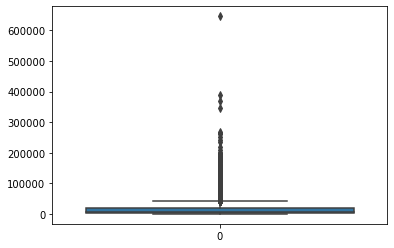

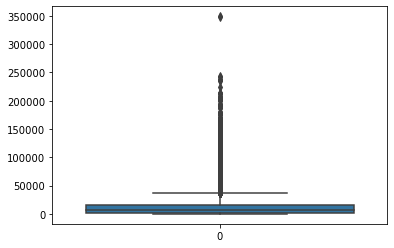

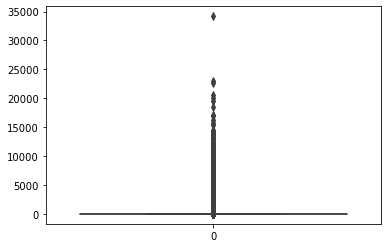

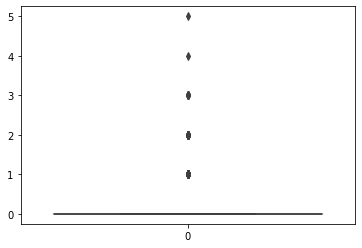

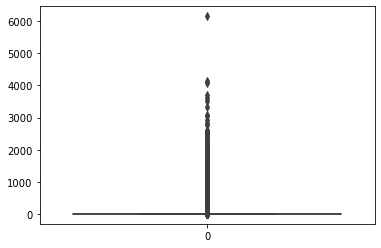

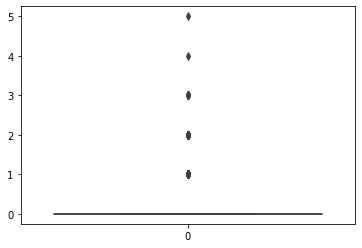

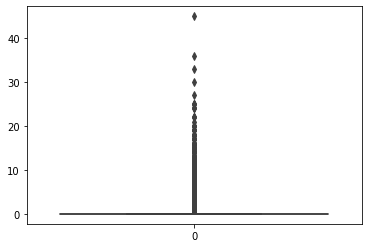

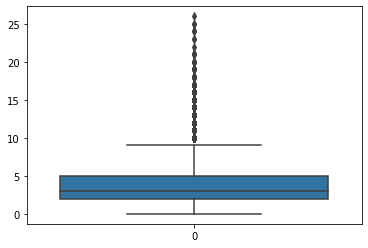

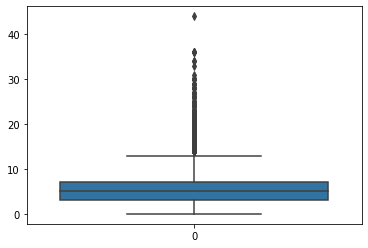

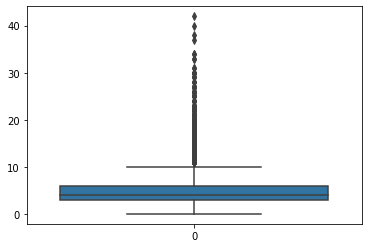

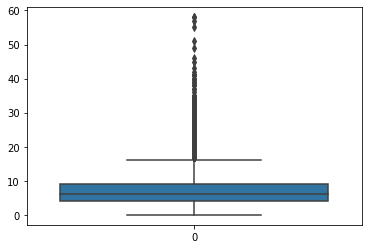

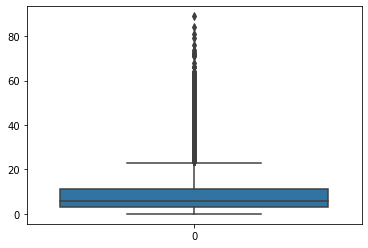

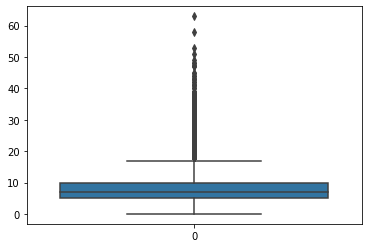

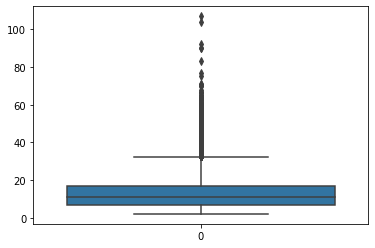

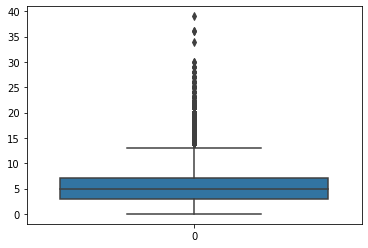

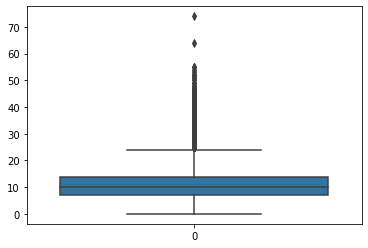

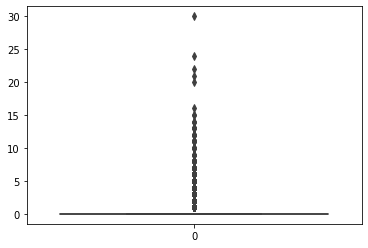

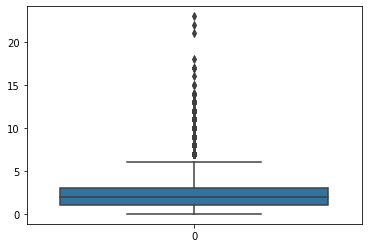

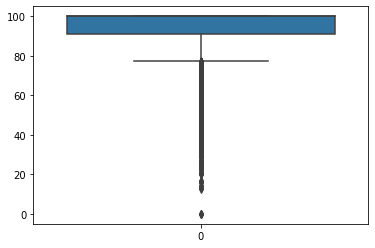

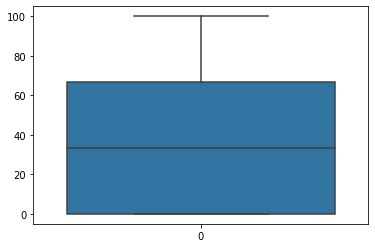

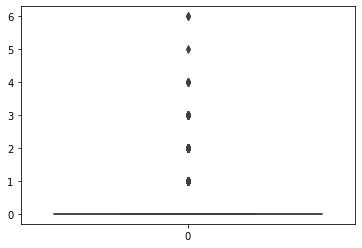

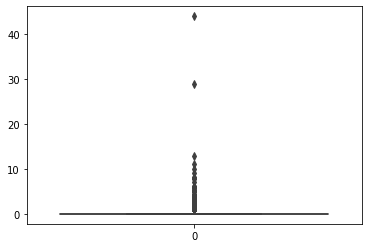

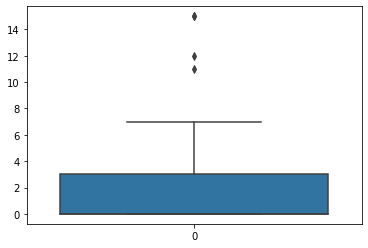

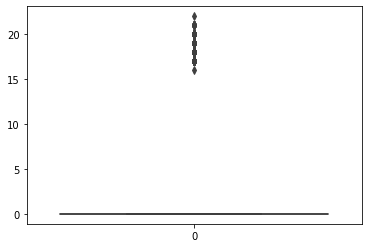

In [50]:
def plot_box(i):
    sns.boxplot(data=df_for_outliers[i])
    plt.show()
for i in df_for_outliers.columns:
    plot_box(i)

In [118]:
mask2 = (preds != -1)
print(mask2)
X2 = X_train_copy[mask2]
# Y2 = X_train_copy[mask2]
print(len(X2))
# print(len(Y2))

[ True  True  True ...  True  True  True]
55125


In [119]:
X2_train = X_train[mask2]
Y2_train = y_train[mask2]
print(len(X2_train))
print(len(Y2_train))

55125
55125


In [120]:
for i in X2_train.columns:
    if X2_train[i].isna().sum() > 0:
        print(i, X2_train[i].isna().sum())

hardship_flag 1140
dti 70
inq_fi 1845
inq_last_12m 1845
open_acc_6m 1845
total_cu_tl 1845
total_bal_il 1845
mths_since_recent_bc 733
mths_since_recent_inq 7099
mths_since_rcnt_il 3637
mths_since_last_delinq 29485
mo_sin_old_il_acct 1836
open_act_il 1845
open_il_12m 1845
open_il_24m 1845
il_util 9476
bc_util 807
all_util 1852
revol_util 56
open_rv_12m 1845
open_rv_24m 1845
max_bal_bc 1845
avg_cur_bal 4
bc_open_to_buy 785
pct_tl_nvr_dlq 4
percent_bc_gt_75 788
missing_term 31859
remaining_term 31859


In [121]:
print(transformed_categorical_features)
for i in transformed_categorical_features:
    if X2_train[i].isna().sum() > 0:
        print(i, X2_train[i].isna().sum())

['initial_list_status', 'application_type', 'purpose', 'int_rate', 'term', 'revol_util', 'verification_status', 'grade', 'hardship_flag', 'home_ownership']
revol_util 56
hardship_flag 1140


In [122]:
X2_train['revol_util'] = X2_train[['revol_util']].fillna(X2_train['revol_util'].mean())
X2_train['missing_term'] = X2_train[['missing_term']].fillna(value=0)
X2_train['remaining_term'] = X2_train[['remaining_term']].fillna(value=0)
X2_train['hardship_flag'] = X2_train[['hardship_flag']].fillna(X2_train['hardship_flag'].value_counts().idxmax())

<ipython-input-122-e7e7d0ff2e16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2_train['revol_util'] = X2_train[['revol_util']].fillna(X2_train['revol_util'].mean())
<ipython-input-122-e7e7d0ff2e16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2_train['missing_term'] = X2_train[['missing_term']].fillna(value=0)
<ipython-input-122-e7e7d0ff2e16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [123]:
for i in X2_train.columns:
    if X2_train[i].isna().sum() > 0:
        print(i, X2_train[i].isna().sum())
        X2_train[i] = X2_train[i].fillna(X2_train[i].mean())

        

dti 70
inq_fi 1845
inq_last_12m 1845
open_acc_6m 1845
total_cu_tl 1845
total_bal_il 1845
mths_since_recent_bc 733
mths_since_recent_inq 7099
mths_since_rcnt_il 3637
mths_since_last_delinq 29485
mo_sin_old_il_acct 1836
open_act_il 1845
open_il_12m 1845
open_il_24m 1845
il_util 9476
bc_util 807
all_util 1852
open_rv_12m 1845
open_rv_24m 1845
max_bal_bc 1845
avg_cur_bal 4
bc_open_to_buy 785
pct_tl_nvr_dlq 4
percent_bc_gt_75 788


<ipython-input-123-9198dd5696f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2_train[i] = X2_train[i].fillna(X2_train[i].mean())


In [124]:
print(X2_train.isna().sum())
X2_train.sample(3)

application_type        0
home_ownership          0
loan_amnt               0
int_rate                0
term                    0
                       ..
percent_bc_gt_75        0
pub_rec_bankruptcies    0
tax_liens               0
missing_term            0
remaining_term          0
Length: 85, dtype: int64


,application_type,home_ownership,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,...,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,missing_term,remaining_term
32259,1.0,1.0,1800,0.2000,36,66.90,2.0,30000.0,2.0,1.0,...,2,3,0,1,100.0,100.0,0,0,3.0,0.0
37615,1.0,2.0,12800,0.1042,60,274.62,4.0,72000.0,2.0,1.0,...,3,20,0,1,94.1,50.0,0,0,0.0,0.0
8486,1.0,1.0,5000,0.1359,36,169.90,1.0,40000.0,3.0,3.0,...,9,13,0,3,100.0,45.5,0,0,3.0,0.0


In [125]:
X2_train.isna().sum()

application_type        0
home_ownership          0
loan_amnt               0
int_rate                0
term                    0
                       ..
percent_bc_gt_75        0
pub_rec_bankruptcies    0
tax_liens               0
missing_term            0
remaining_term          0
Length: 85, dtype: int64

In [126]:
for i in X_test.columns:
    print(i, X_test[i].isna().sum())

application_type 0
home_ownership 0
loan_amnt 0
int_rate 0
term 0
installment 0
grade 0
annual_inc 0
verification_status 0
purpose 0
hardship_flag 328
dti 27
delinq_2yrs 0
inq_fi 496
inq_last_12m 496
inq_last_6mths 0
fico_range_low 0
fico_range_high 0
last_fico_range_high 0
last_fico_range_low 0
mort_acc 0
open_acc 0
open_acc_6m 496
acc_open_past_24mths 0
pub_rec 0
total_acc 0
initial_list_status 0
out_prncp 0
out_prncp_inv 0
total_pymnt 0
total_pymnt_inv 0
total_rec_prncp 0
total_rec_int 0
total_rec_late_fee 0
total_cu_tl 496
tot_coll_amt 0
tot_cur_bal 0
total_bal_il 496
total_rev_hi_lim 0
tot_hi_cred_lim 0
total_bal_ex_mort 0
total_bc_limit 0
total_il_high_credit_limit 0
mths_since_recent_bc 190
mths_since_recent_inq 1829
mths_since_rcnt_il 974
mths_since_last_delinq 7885
mo_sin_old_il_acct 486
mo_sin_old_rev_tl_op 0
mo_sin_rcnt_rev_tl_op 0
mo_sin_rcnt_tl 0
open_act_il 496
open_il_12m 496
open_il_24m 496
il_util 2682
bc_util 208
all_util 497
revol_util 20
open_rv_12m 496
open_rv_24m 

In [127]:
X_test['missing_term'] = X_test[['missing_term']].fillna(value=0)
X_test['remaining_term'] = X_test[['remaining_term']].fillna(value=0)
X_test['revol_util'] = X_test[['revol_util']].fillna(X2_train['revol_util'].mean())
X_test['hardship_flag'] = X_test[['hardship_flag']].fillna(X2_train['hardship_flag'].value_counts().idxmax())

for i in X_test.columns:
    if X_test[i].isna().sum() > 0:
        X_test[i] = X_test[i].fillna(X2_train[i].mean())
        
print(X_test.isna().sum())

application_type        0
home_ownership          0
loan_amnt               0
int_rate                0
term                    0
                       ..
percent_bc_gt_75        0
pub_rec_bankruptcies    0
tax_liens               0
missing_term            0
remaining_term          0
Length: 85, dtype: int64


<ipython-input-127-39c5394fb5a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['missing_term'] = X_test[['missing_term']].fillna(value=0)
<ipython-input-127-39c5394fb5a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['remaining_term'] = X_test[['remaining_term']].fillna(value=0)
<ipython-input-127-39c5394fb5a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [128]:
# Normalization on Train Dataset
from sklearn.preprocessing import Normalizer

def get_Normalized_frame(df):
    transformed_label = [
        'application_type',
        'hardship_flag',
        'initial_list_status',
        'home_ownership',
        'grade',
        'purpose',
        'verification_status'
    ]
    print(df.shape)
    columns_for_normalization = df[df.columns[~df.columns.isin(transformed_label)]]
    columns_for_normalization
    
    transformer = Normalizer().fit(columns_for_normalization)  # fit does nothing.
    normalized_data = pd.DataFrame(transformer.transform(columns_for_normalization),
                       columns=columns_for_normalization.columns)
    cat_df = df[transformed_label].copy()
    for i in transformed_label:
        normalized_data[i] = cat_df[i].tolist()
    
    normalized_data[transformed_label].isna().sum()
    return normalized_data

# Normalization on Test Dataset

trained_normalized_df = get_Normalized_frame(X2_train)
test_normalized_df = get_Normalized_frame(X_test)
test_normalized_df.isna().sum()

(55125, 85)
(15432, 85)


loan_amnt              0
int_rate               0
term                   0
installment            0
annual_inc             0
                      ..
initial_list_status    0
home_ownership         0
grade                  0
purpose                0
verification_status    0
Length: 85, dtype: int64

C:\Users\UEA\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


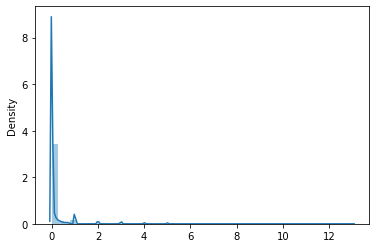

In [129]:
ax = sns.distplot(trained_normalized_df)

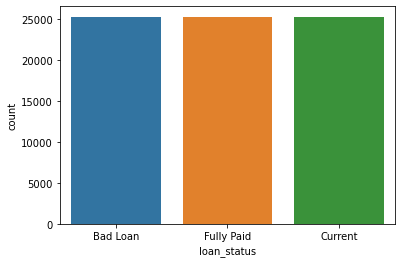

In [130]:
# Data Balancing
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_train_bal, y_train_bal = sm.fit_resample(trained_normalized_df, Y2_train)
# plt.figure(figsize=(15, 10))
sns.countplot(x='loan_status', data=y_train_bal.to_frame())
plt.show()

In [131]:
X_train_bal.sample(3)

,loan_amnt,int_rate,term,installment,annual_inc,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,...,tax_liens,missing_term,remaining_term,application_type,hardship_flag,initial_list_status,home_ownership,grade,purpose,verification_status
186,0.086154,2.541554e-07,0.000162,0.001807,0.390624,0.000016,0.0,0.000003,0.000003,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,2.0,4.0,1.0,3.0
50338,0.226872,1.088078e-06,0.000327,0.007534,0.580792,0.000254,0.0,0.000018,0.000018,0.000009,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,1.0,1.0
4127,0.173667,2.585165e-06,0.000893,0.005638,0.610317,0.000230,0.0,0.000000,0.000025,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,1.0,2.0


In [132]:
# Model Applying With PCA(), Pipeline()

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier

estimators = [("PCA", PCA()), ("clf", AdaBoostClassifier())]

pipe = Pipeline(estimators)
print(pipe)

#we can use a pipeline like a classifier or transformer.
pipe.fit(X_train_bal, y_train_bal)
y_train_preds = pipe.predict(X_train_bal)
y_preds = pipe.predict(test_normalized_df)

# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(y_test, y_preds)
# print(accuracy)

Pipeline(steps=[('PCA', PCA()), ('clf', AdaBoostClassifier())])


In [64]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train_bal, y_train_preds)
accuracy = accuracy_score(y_test, y_preds)
print(train_accuracy, accuracy)

0.8627017058552329 0.8448678071539658


[[1826  198  109]
 [ 303 5247  901]
 [ 131  752 5965]]


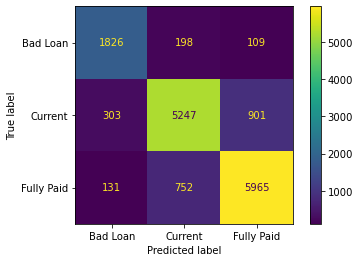

In [65]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
conf_mat = confusion_matrix(y_test, y_preds)
print(conf_mat)
plot_confusion_matrix(pipe, test_normalized_df, y_test )

# Moldeing with PCA

In [ ]:
# Decision Tree Grid Pipe

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

tree_estimators = Pipeline([("PCA", PCA()), ("Dec_tree", DecisionTreeClassifier())])
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10]
parameters = dict(PCA__n_components=[10, 20],
                      Dec_tree__criterion=criterion,
                      Dec_tree__max_depth=max_depth)
tree_grid = GridSearchCV(tree_estimators, parameters)
tree_grid.fit(X_train_bal, y_train_bal)

GridSearchCV(estimator=Pipeline(steps=[('PCA', PCA()),
                                       ('Dec_tree', DecisionTreeClassifier())]),
             param_grid={'Dec_tree__criterion': ['gini', 'entropy'],
                         'Dec_tree__max_depth': [2, 4, 6, 8, 10],
                         'PCA__n_components': [10, 20]})

In [156]:
print(tree_grid.best_params_)
#collect predictions on test data
y_d_tree_train_preds = tree_grid.predict(X_train_bal)
y_d_tree_preds = tree_grid.predict(test_normalized_df)

{'Dec_tree__criterion': 'entropy', 'Dec_tree__max_depth': 10, 'PCA__n_components': 20}


In [162]:
#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score
training_accuracy = accuracy_score(y_train_bal, y_d_tree_train_preds)
accuracy = accuracy_score(y_test, y_d_tree_preds)
print(training_accuracy, accuracy)

0.8532569320951063 0.8101347848626231


In [68]:
# Confusion Matrix for Decision Tree GRID

[[1709  258  166]
 [ 109 5022 1320]
 [ 189  888 5771]]


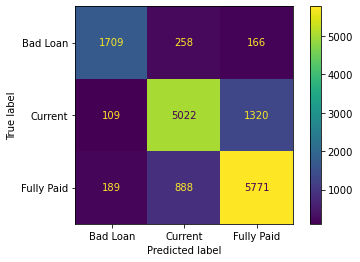

In [136]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
conf_mat = confusion_matrix(y_test, y_d_tree_preds)
print(conf_mat)
plot_confusion_matrix(tree_grid, test_normalized_df, y_test )

In [137]:
# Random Forest Grid Pipe

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

random_for_estimators = Pipeline([("PCA", PCA()), ("Random_Forest", RandomForestClassifier(random_state=1))])

parameters = dict(PCA__n_components=[10, 20],
                      Random_Forest__n_estimators=[20, 30],
                      Random_Forest__max_features=['auto', 'sqrt', 'log2'],
                      Random_Forest__max_depth=[2,4,6,8,10],
                      Random_Forest__criterion=['gini', 'entropy'])
random_forest_grid = GridSearchCV(random_for_estimators, parameters)
random_forest_grid.fit(X_train_bal, y_train_bal)

GridSearchCV(estimator=Pipeline(steps=[('PCA', PCA()),
                                       ('Random_Forest',
                                        RandomForestClassifier(random_state=1))]),
             param_grid={'PCA__n_components': [10, 20],
                         'Random_Forest__criterion': ['gini', 'entropy'],
                         'Random_Forest__max_depth': [2, 4, 6, 8, 10],
                         'Random_Forest__max_features': ['auto', 'sqrt',
                                                         'log2'],
                         'Random_Forest__n_estimators': [20, 30]})

In [139]:
print(random_forest_grid.best_params_)
#collect predictions on test data
y_random_forest_train_preds = random_forest_grid.predict(X_train_bal)
y_random_forest_test_preds = random_forest_grid.predict(test_normalized_df)


{'PCA__n_components': 20, 'Random_Forest__criterion': 'gini', 'Random_Forest__max_depth': 10, 'Random_Forest__max_features': 'auto', 'Random_Forest__n_estimators': 30}
0.8396837739761535


In [163]:


#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train_bal, y_random_forest_train_preds)
accuracy = accuracy_score(y_test, y_random_forest_test_preds)
print(train_accuracy, accuracy)

0.8731739445432392 0.8396837739761535


In [140]:
# Adaboost Grid Pipe

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

adaboost_estimators = Pipeline([("PCA", PCA()), ("adaboost", AdaBoostClassifier(random_state=1))])

parameters = dict(PCA__n_components=[10, 20],
                      adaboost__n_estimators=[50, 60, 70],
                      adaboost__learning_rate=[1, 2, 3],)
adaboost_grid = GridSearchCV(adaboost_estimators, parameters)
adaboost_grid.fit(X_train_bal, y_train_bal)

GridSearchCV(estimator=Pipeline(steps=[('PCA', PCA()),
                                       ('adaboost',
                                        AdaBoostClassifier(random_state=1))]),
             param_grid={'PCA__n_components': [10, 20],
                         'adaboost__learning_rate': [1, 2, 3],
                         'adaboost__n_estimators': [50, 60, 70]})

In [142]:
print(adaboost_grid.best_params_)
y_adaboost_train_preds = adaboost_grid.predict(X_train_bal)
y_adaboost_test_preds = adaboost_grid.predict(test_normalized_df)


{'PCA__n_components': 20, 'adaboost__learning_rate': 1, 'adaboost__n_estimators': 70}
0.854587869362364


In [164]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train_bal, y_adaboost_train_preds)
accuracy = accuracy_score(y_test, y_adaboost_test_preds)
print(train_accuracy, accuracy)

0.8649015346110782 0.854587869362364


# Model Applying with Correlation

In [144]:
train_df_for_corr = X_train_bal.copy()
corr = train_df_for_corr.corr()
corr

,loan_amnt,int_rate,term,installment,annual_inc,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,...,tax_liens,missing_term,remaining_term,application_type,hardship_flag,initial_list_status,home_ownership,grade,purpose,verification_status
loan_amnt,1.000000,0.546019,0.639919,0.964129,0.500347,0.221497,0.059714,0.090211,0.177365,0.159642,...,0.032718,0.221519,0.254979,-0.090212,NaN,-0.020041,-0.207318,-0.043660,-0.050223,-0.020297
int_rate,0.546019,1.000000,0.886709,0.607527,0.520460,0.345740,0.137802,0.279564,0.419888,0.384243,...,0.043455,0.345989,0.112631,0.031039,NaN,0.112476,-0.226950,-0.010174,0.009959,-0.028792
term,0.639919,0.886709,1.000000,0.619771,0.599878,0.352239,0.126568,0.233192,0.371174,0.328275,...,0.044391,0.416359,0.253164,0.024230,NaN,0.009697,-0.246310,-0.055092,0.027374,-0.003090
installment,0.964129,0.607527,0.619771,1.000000,0.519628,0.241134,0.074614,0.118003,0.213496,0.196273,...,0.037548,0.226160,0.129807,-0.066094,NaN,0.043792,-0.221485,-0.002830,-0.047007,-0.019520
annual_inc,0.500347,0.520460,0.599878,0.519628,1.000000,0.089882,0.126793,0.194471,0.283851,0.243381,...,0.080045,0.271398,0.075857,0.227179,NaN,0.032307,-0.324974,-0.013105,0.062532,0.135731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
initial_list_status,-0.020041,0.112476,0.009697,0.043792,0.032307,0.030491,0.021112,0.049071,0.056194,0.056541,...,0.020069,-0.006537,-0.132294,0.056661,NaN,1.000000,-0.026731,0.040323,0.011568,-0.026772
home_ownership,-0.207318,-0.226950,-0.246310,-0.221485,-0.324974,-0.089399,-0.035397,-0.077937,-0.111846,-0.094997,...,-0.018081,-0.095814,-0.028758,-0.078728,NaN,-0.026731,1.000000,0.008908,-0.023740,-0.046791
grade,-0.043660,-0.010174,-0.055092,-0.002830,-0.013105,-0.026977,-0.009666,-0.034599,-0.041869,-0.028285,...,-0.015566,-0.012600,-0.074631,0.019112,NaN,0.040323,0.008908,1.000000,0.018884,0.002168
purpose,-0.050223,0.009959,0.027374,-0.047007,0.062532,-0.014789,-0.002086,0.001274,0.013778,0.014713,...,0.004230,0.039156,-0.024145,0.048230,NaN,0.011568,-0.023740,0.018884,1.000000,0.026500


In [145]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.70:
            if columns[j]:
                columns[j] = False
selected_columns = train_df_for_corr.columns[columns]

In [146]:
selected_columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_fi',
       'inq_last_12m', 'inq_last_6mths', 'mort_acc', 'open_acc', 'open_acc_6m',
       'pub_rec', 'out_prncp', 'total_rec_late_fee', 'total_cu_tl',
       'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'total_rev_hi_lim',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'mths_since_rcnt_il',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'open_act_il',
       'open_il_12m', 'max_bal_bc', 'avg_cur_bal', 'recoveries',
       'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
       'num_accts_ever_120_pd', 'num_il_tl', 'num_tl_90g_dpd_24m', 'tax_liens',
       'missing_term', 'application_type', 'hardship_flag',
       'initial_list_status', 'home_ownership', 'grade', 'purpose',
       'verification_status'],
      dtype='object')

In [147]:
less_correlated_df = train_df_for_corr[selected_columns]
less_correlated_test_df = test_normalized_df[selected_columns]
less_correlated_df.shape

(75915, 43)

In [148]:
# Decision Tree with COrrelation
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

d_tree_clf = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10]
parameters = {
    "criterion" : ['gini', 'entropy'],
    "max_depth": [2,4,6,8,10]
}
d_tree_clf_grid = GridSearchCV(d_tree_clf, parameters)
d_tree_clf_grid.fit(less_correlated_df, y_train_bal)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10]})

In [165]:
d_tree_clf_preds = d_tree_clf_grid.predict(less_correlated_test_df)
d_tree_train_clf_preds = d_tree_clf_grid.predict(less_correlated_df)
#calculate the score - accuracy / error or other metrics.


In [166]:
from sklearn.metrics import accuracy_score
training_accuracy = accuracy_score(y_train_bal, d_tree_train_clf_preds)
accuracy = accuracy_score(y_test, d_tree_clf_preds)
print(training_accuracy, accuracy)

0.9397484028189422 0.9406428201140488


In [150]:
# Random Forest with Correlation

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier()
parameters = {
    "criterion" : ['gini', 'entropy'],
    "max_depth": [6,8],
    "n_estimators": [20, 30],
    "max_features": ['auto']
}
random_forest_clf_grid = GridSearchCV(random_forest_clf, parameters)
random_forest_clf_grid.fit(less_correlated_df, y_train_bal)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [6, 8],
                         'max_features': ['auto'], 'n_estimators': [20, 30]})

In [167]:
random_forest_clf_preds = random_forest_clf_grid.predict(less_correlated_test_df)
random_forest_train_clf_preds = random_forest_clf_grid.predict(less_correlated_df)

In [168]:
#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train_bal, random_forest_train_clf_preds)
accuracy = accuracy_score(y_test, random_forest_clf_preds)
print(train_accuracy, accuracy)

0.9309754330501219 0.942846034214619


In [153]:
# Adaboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier()
parameters = {
    "learning_rate": [1, 2],
    "n_estimators": [20, 30]
}
adaboost_clf_grid = GridSearchCV(adaboost_clf, parameters)
adaboost_clf_grid.fit(less_correlated_df, y_train_bal)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1, 2], 'n_estimators': [20, 30]})

In [169]:
adaboost_clf_preds = adaboost_clf_grid.predict(less_correlated_test_df)
adaboost_train_clf_preds = adaboost_clf_grid.predict(less_correlated_df)

In [170]:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, adaboost_clf_preds)
training_accuracy = accuracy_score(y_train_bal, adaboost_train_clf_preds)
print(training_accuracy, accuracy)

0.9224790884541922 0.9375324002073613


# CORRELATION EVALUATION

[[1338  233  562]
 [   5 6352   94]
 [  70    0 6778]]
Adaboost Matrix
(0.9387140578444152, 0.9375324002073613, 0.9328846300557029, None)
[[1299  237  597]
 [   2 6422   27]
 [  19    0 6829]]
Random Forest
(0.9457699747661353, 0.942846034214619, 0.9373417144611982, None)
[[1333  221  579]
 [  56 6395    0]
 [  60    0 6788]]
Decision Tree
(0.9400948690849779, 0.9406428201140488, 0.9358447876101199, None)


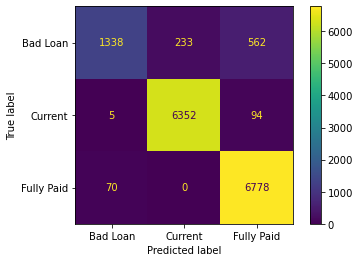

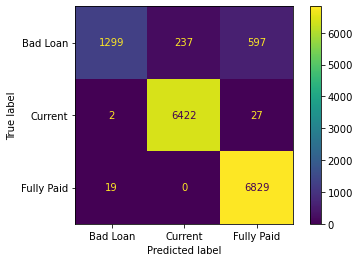

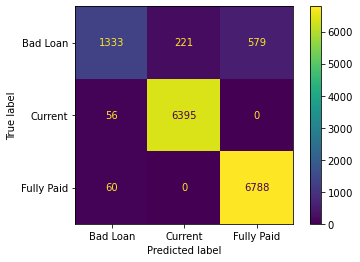

In [171]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_fscore_support
classifiers = [
    {"name": "Adaboost Matrix" ,"model": adaboost_clf_grid, "preds": adaboost_clf_preds}, 
    {"name": "Random Forest" ,"model": random_forest_clf_grid, "preds": random_forest_clf_preds},
    {"name": "Decision Tree" ,"model": d_tree_clf_grid, "preds": d_tree_clf_preds}, 
    ]
for i in classifiers:
    conf_mat = confusion_matrix(y_test, i["preds"])
    print(conf_mat)
    print(i["name"])
    print(precision_recall_fscore_support(y_test, i["preds"], average='weighted'))
    plot_confusion_matrix(i["model"], less_correlated_test_df, y_test )
#     print(i["preds"])

# PCA EVALUATION

[[1735  229  169]
 [ 187 5417  847]
 [ 105  707 6036]]
PCA Adaboost Matrix
(0.8545672901250287, 0.854587869362364, 0.8543989233435736, None)
[[1685  283  165]
 [   4 5246 1201]
 [  25  796 6027]]
PCA Random Forest
(0.8443568780277, 0.8396837739761535, 0.8399824296311886, None)
[[1709  258  166]
 [ 109 5022 1320]
 [ 189  888 5771]]
PCA Decision Tree
(0.810942248248478, 0.8101347848626231, 0.8099597159565544, None)


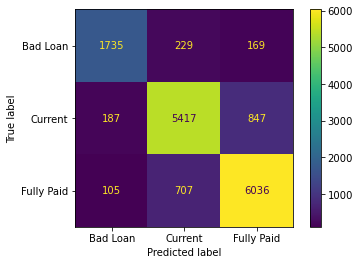

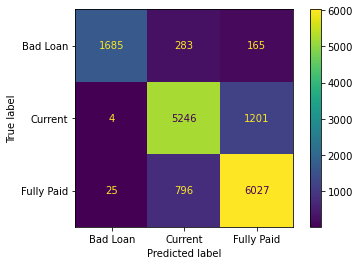

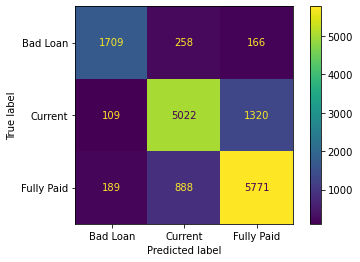

In [202]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_fscore_support
classifiers = [
    {"name": "PCA Adaboost Matrix" ,"model": adaboost_grid, "preds": y_adaboost_test_preds}, 
    {"name": "PCA Random Forest" ,"model": random_forest_grid, "preds": y_random_forest_test_preds},
    {"name": "PCA Decision Tree" ,"model": tree_grid, "preds": y_d_tree_preds}, 
    ]
for i in classifiers:
    conf_mat = confusion_matrix(y_test, i["preds"])
    print(conf_mat)
    print(i["name"])
    print(precision_recall_fscore_support(y_test, i["preds"], average='weighted'))
    plot_confusion_matrix(i["model"], test_normalized_df, y_test )

# Correlation Recall Precision

In [185]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
#or we can use the functions
precision = precision_score(y_test, y_adaboost_test_preds, average="weighted")
recall = recall_score(y_test, y_adaboost_test_preds, average="weighted")

In [204]:
classifiers = [
    {"name": "Adaboost Matrix" ,"model": adaboost_clf_grid, "preds": adaboost_clf_preds, "actual_results": y_test}, 
    {"name": "Random Forest" ,"model": random_forest_clf_grid, "preds": random_forest_clf_preds, "actual_results": y_test},
    {"name": "Decision Tree" ,"model": d_tree_clf_grid, "preds": d_tree_clf_preds, "actual_results": y_test}, 
]
for i in classifiers:
    classi=classification_report(i["actual_results"], i["preds"])




# PCA Recall Precision

In [199]:
pca_classifiers = [
    {"name": "PCA Adaboost Matrix" ,"model": adaboost_grid, "preds": y_adaboost_test_preds, "actual_results": y_test}, 
    {"name": "PCA Random Forest" ,"model": random_forest_grid, "preds": y_random_forest_test_preds, "actual_results": y_test},
    {"name": "PCA Decision Tree" ,"model": tree_grid, "preds": y_d_tree_preds, "actual_results": y_test}, 
    ]
for i in pca_classifiers:
    print(i["name"])
    classi=classification_report(i["actual_results"], i["preds"])
    print(classi)


PCA Adaboost Matrix
              precision    recall  f1-score   support

    Bad Loan       0.86      0.81      0.83      2133
     Current       0.85      0.84      0.85      6451
  Fully Paid       0.86      0.88      0.87      6848

    accuracy                           0.85     15432
   macro avg       0.85      0.84      0.85     15432
weighted avg       0.85      0.85      0.85     15432

PCA Random Forest
              precision    recall  f1-score   support

    Bad Loan       0.98      0.79      0.88      2133
     Current       0.83      0.81      0.82      6451
  Fully Paid       0.82      0.88      0.85      6848

    accuracy                           0.84     15432
   macro avg       0.88      0.83      0.85     15432
weighted avg       0.84      0.84      0.84     15432

PCA Decision Tree
              precision    recall  f1-score   support

    Bad Loan       0.85      0.80      0.83      2133
     Current       0.81      0.78      0.80      6451
  Fully Paid       

# Need to apply Validation on Model for both Correlation Threshold and PCA

In [178]:
from sklearn.model_selection import cross_val_score
cor_Adaboost_scores = cross_val_score(adaboost_grid, less_correlated_df, y_train_bal, cv=5)
cor_Adaboost_scores

array([0.75492327, 0.76743727, 0.77046697, 0.77369426, 0.78561549])

In [205]:
# from sklearn.model_selection import StratifiedKFold
# accuracy = []
# skf = StratifiedKFold(n_splits = 10)
# skf.get_n_splits(X, Y)
# for train_index, test_index in skf.split(X2_train, Y2_train):
#     X1_train, X1_test = X2_train.iloc[train_index], X2_train.iloc[test_index]
#     Y1_train, Y1_test = Y2_train.iloc[train_index], Y2_train.iloc[test_index]
#     pipe.fit(X1_train, Y1_train)
#     predictions = pipe.predict(X1_test)
#     score = accuracy_score(predictions, Y1_test)
#     accuracy.append(score)

# print(accuracy)